## TASK 1

### 1. Deriving the Logistic Regression Objective Function using MLE

#### Logistic Regression Model

We use the logistic (sigmoid) function defined as:

$$
\theta(z) = \frac{1}{1 + e^{-z}}
$$

For logistic regression, the model is:

$$
P(Y = 1 \mid X = x) = \theta(w^T x) = \frac{e^{w^T x}}{1 + e^{w^T x}}
$$

$$
P(Y = 0 \mid X = x) = 1 - \theta(w^T x) = \theta(-w^T x)
$$

These two cases can be combined into a single expression:

$$
P(Y = y \mid X = x) = \theta(w^T x)^y \, \theta(-w^T x)^{1 - y}
$$

where $y \in \{0,1\}$.

---

#### Likelihood Function

The likelihood of the parameters $w$ is:

$$
L(w) = P(Y \mid X, w) = \prod_{i=1}^{n} P(y_i \mid x_i, w)
$$

Substituting the logistic model:

$$
L(w) = \prod_{i=1}^{n} \theta(w^T x_i)^{y_i} \, \theta(-w^T x_i)^{1 - y_i}
$$

---

#### Log-Likelihood

Instead of maximizing the likelihood directly, we maximize the log-likelihood, which converts the product into a sum:

$$
\ell(w) = \ln L(w)
$$

$$
\ell(w) = \sum_{i=1}^{n} \left[ y_i \ln \theta(w^T x_i) + (1 - y_i)\ln \theta(-w^T x_i) \right]
$$

Using the identity $\theta(-z) = 1 - \theta(z)$, this becomes:

$$
\ell(w) = \sum_{i=1}^{n} \left[ y_i \ln \theta(w^T x_i) + (1 - y_i)\ln (1 - \theta(w^T x_i)) \right]
$$

Maximizing the log-likelihood is equivalent to minimizing the negative log-likelihood:

$$
E(w) = -\ell(w)
$$

$$
E(w) = -\sum_{i=1}^{n} \left[ y_i \ln \theta(w^T x_i) + (1 - y_i)\ln (1 - \theta(w^T x_i)) \right]
$$

This loss function is known as the binary cross-entropy loss, and it is the standard objective function used in logistic regression.

---

#### Final Objective

$$
\boxed{
\min_{w} \; -\sum_{i=1}^{n} \left[ y_i \ln \theta(w^T x_i) + (1 - y_i)\ln (1 - \theta(w^T x_i)) \right]
}
$$

### MAP vs MLE

MAP is short for **Maximum A Posteriori**. It maximizes the posterior probability of the parameters given the data: P(w|D), when MLE maximizes the likelihood of the data given the parameters: P(D|w).

MAP uses Bayes' Theorem to incorporate a **prior distribution** P(w) into the objective function:

$$P(w|D) \propto P(D|w) \cdot P(w)$$

In the context of **Logistic Regression**, MAP therefore assumes the weights follow a specific distribution (which acts as regularization to the loss function)  when MLE assumes the weights are equally likely.

Reference: https://medium.com/@devcharlie2698619/the-intuition-behind-maximum-likelihood-estimation-mle-and-maximum-a-posteriori-estimation-map-b8ba1ba1078f


### 2. ML problem
The machine learning problem I wish to solve with logistic regression is Breast Cancer Detection, where the goal is to predict whether a mass is benign or malignant based on the physical aspects of the mass.\
Logistic regression is the best choice for this problem because it outputs the probability of the positive class (malignant), which allows doctors to have the confidence of the prediction. Also, since the model assigns a specific weight to each input feature, we can easily interpret which physical characteristics contribute most to the risk of cancer.\
Another linear classification model we can use is Linear SVM, which looks to separate both classes as much as possible with a decision boundary. While SVM can easily be changed to model more complex relationships with the use of kernels, the probability output of logistic regression is still very important for this specific problem.\
Reference: https://dataminingbook.info/book_html/chap21/book.html 

### 3. Dataset Mapping and Assumptions
$x_i$ (Features): The physical measurements for the $i$-th patient.\
$y_i$ (Label): The diagnosis for the $i$-th patient (1 = Malignant, 0 = Benign).\
$w$ (Weights): The parameters here represent the importance of each feature in predicting cancer risk.

Assumptions:\
Independent and Identically Distributed Data: We assume each patient's cancer diagnosis is independent of others in the dataset.\
Bernoulli Distribution: We assume the target $y$ is strictly binary (0 or 1), which matches the benign/malignant nature of the problem. \
Linearity: We assume the log-odds of the tumor being malignant increases linearly with the features.

## TASK 2

### 1. Choice of dataset
The dataset chosen is the breast cancer dataset which has 30 features and 569 observations.\
Reference: https://www.kaggle.com/datasets/wasiqaliyasir/breast-cancer-dataset?select=Breast_cancer_dataset.csv

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


%matplotlib inline

In [120]:
df = pd.read_csv("Breast_cancer_dataset.csv")

In [121]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 2. Exploratory Data Analysis

In [122]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [124]:
df = df.drop('Unnamed: 32',axis=1)
df = df.drop('id',axis=1)

In [125]:
df.shape

(569, 31)

In [126]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [127]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [128]:
#Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
Y = df['diagnosis']
X = df.drop('diagnosis', axis=1)
df.head() # 1 => M (Malignant) ; 0 => B (Benign)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [129]:
Y.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [130]:
X.shape

(569, 30)

In [131]:
Y.shape

(569,)

In [132]:
# 1. temporary scaling so we can get appropriate values for multicollinearity 
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

array([[<Axes: title={'center': 'diagnosis'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>],
       [<Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>],
       [<Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'cen

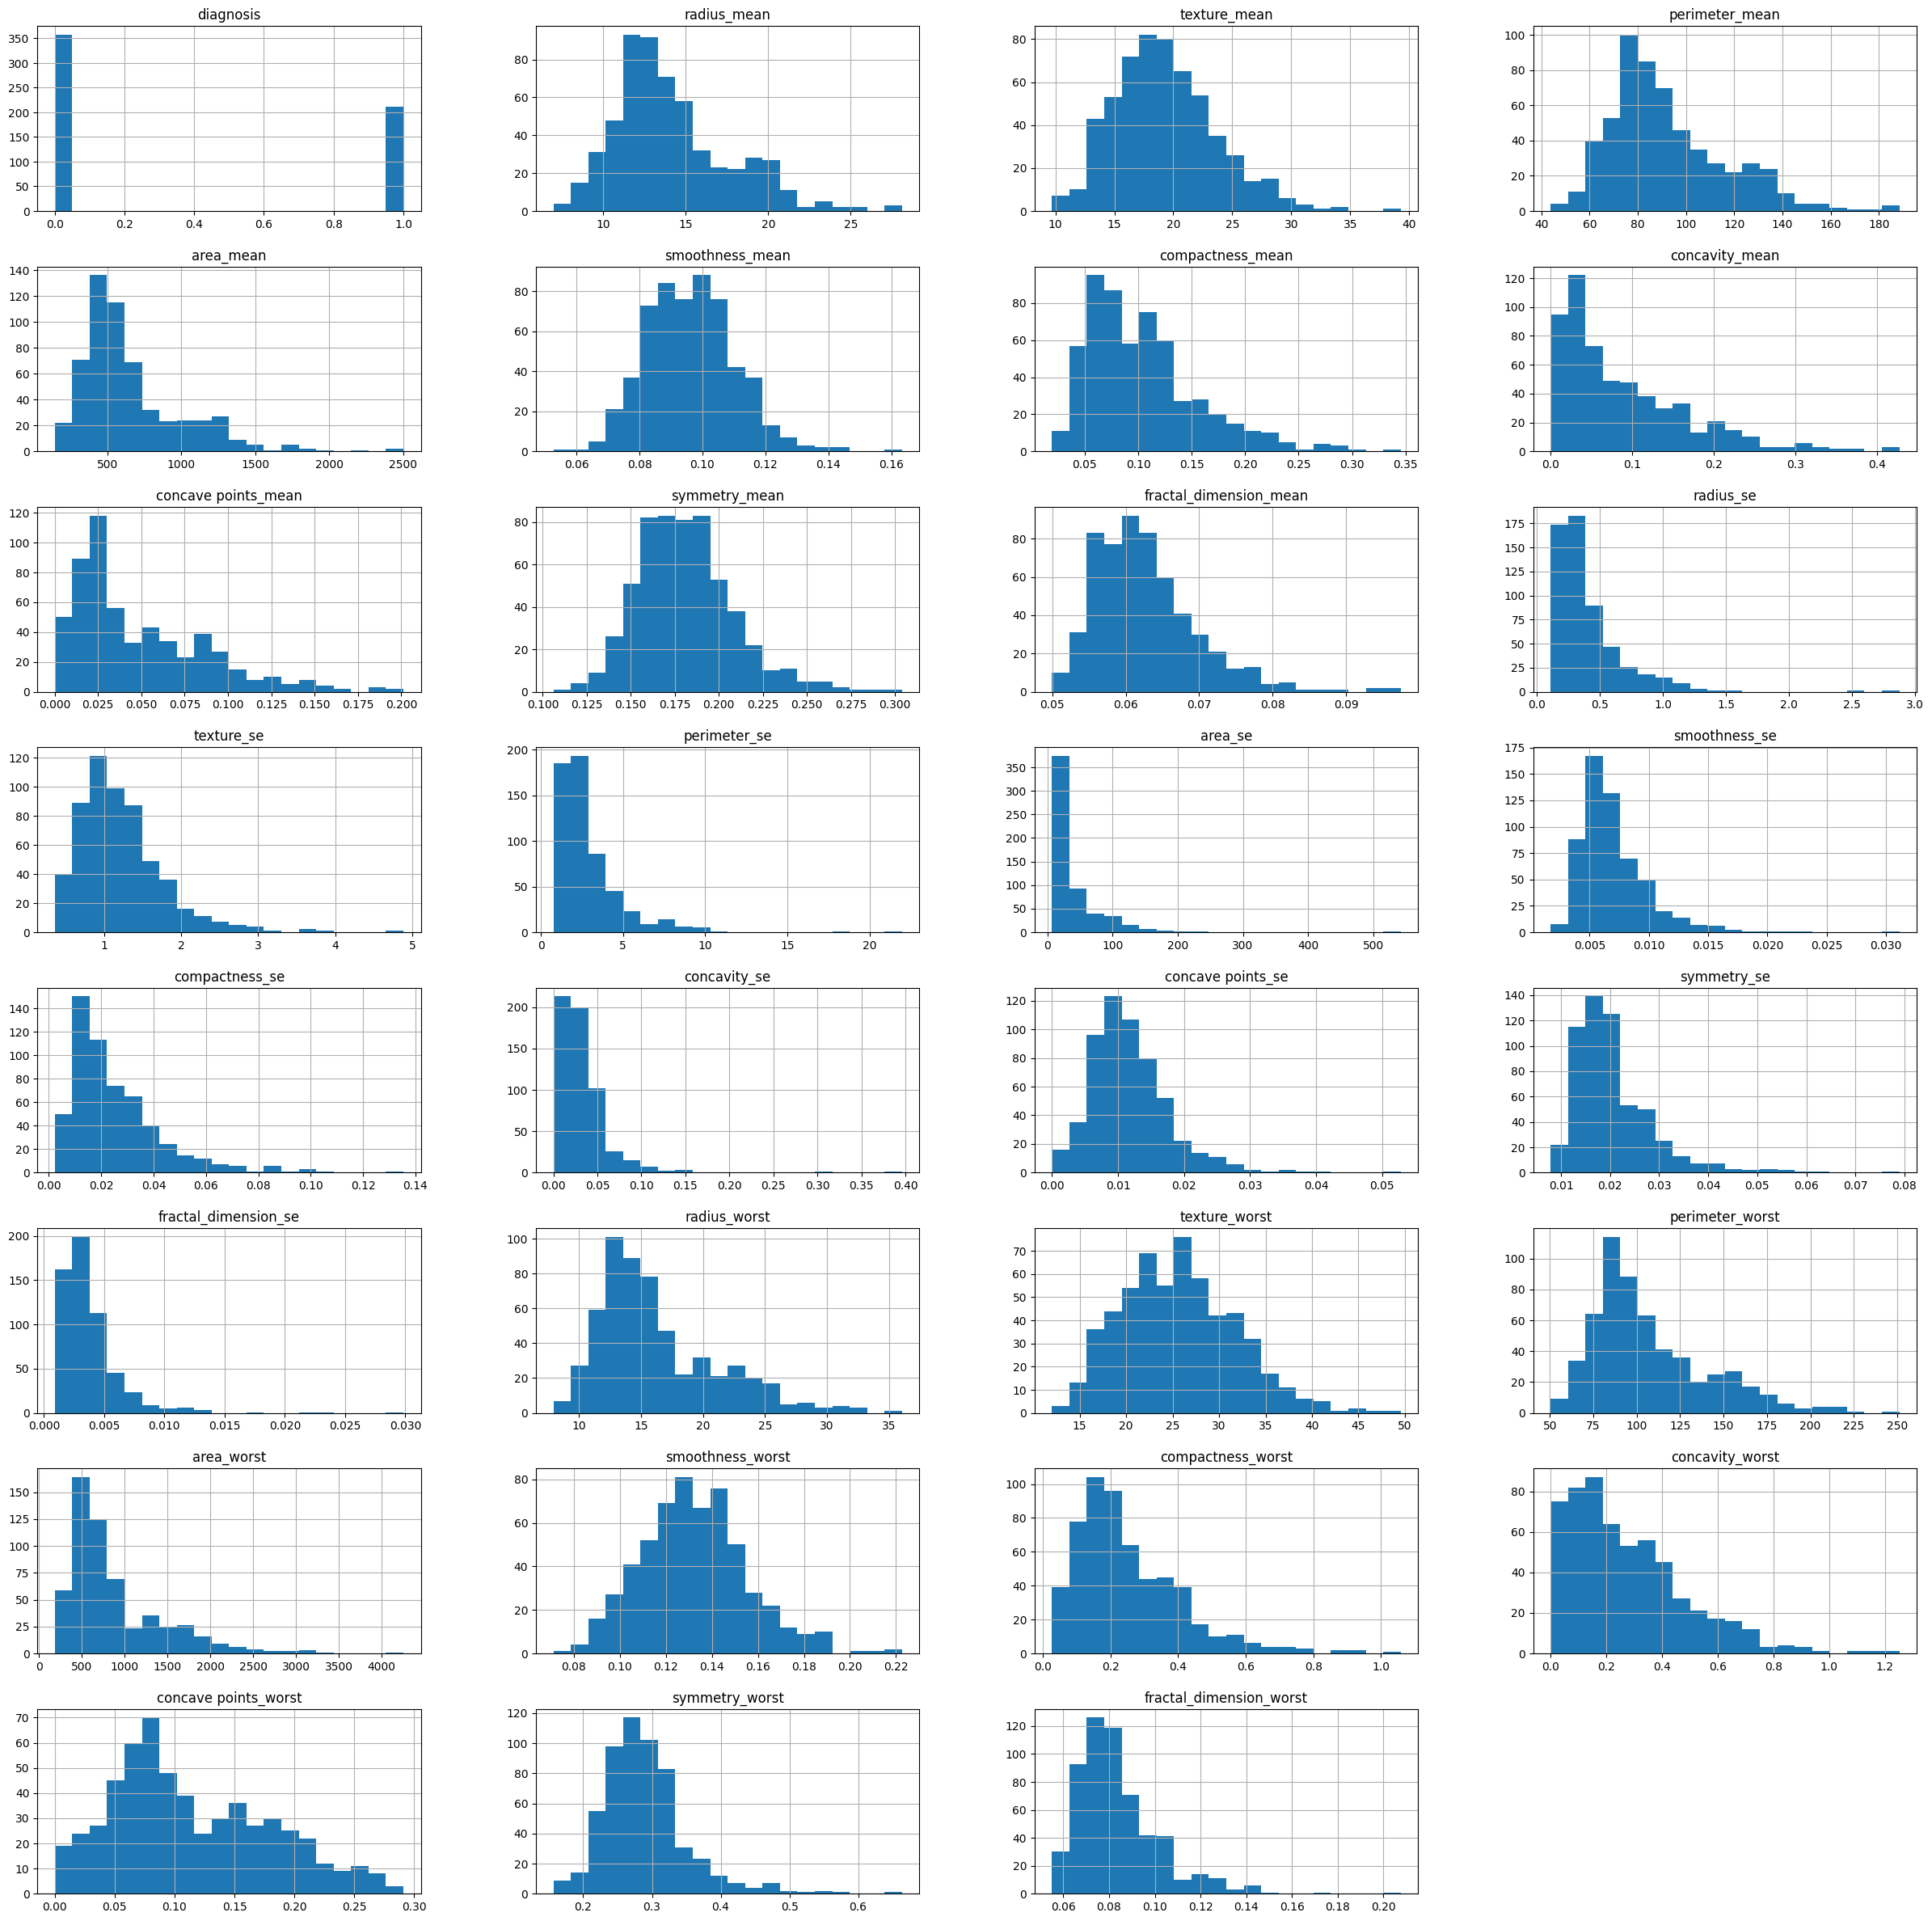

In [133]:
df.hist(bins=20,figsize=(30,30),layout=(8,4))

In [134]:
X.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


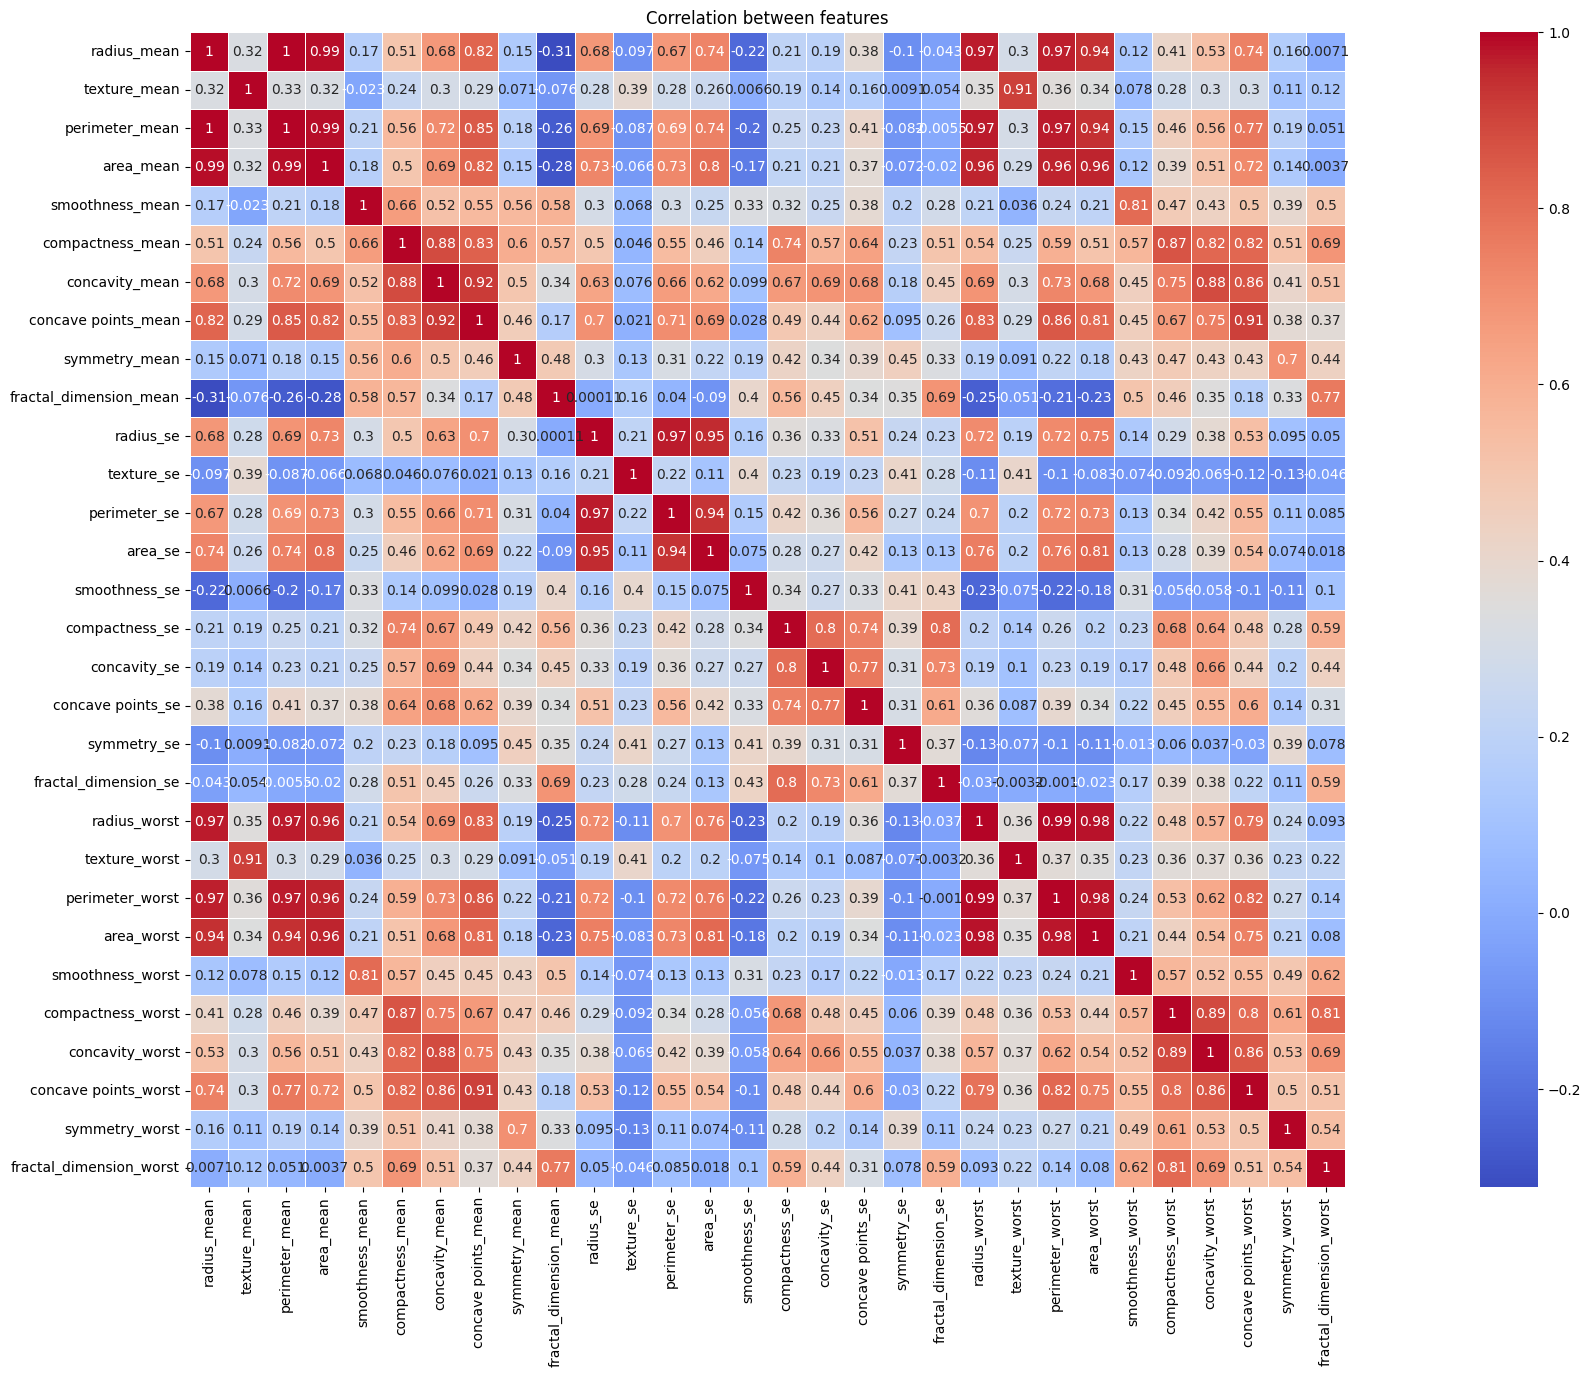

In [135]:
plt.figure(figsize=(35,15))
sns.heatmap(X.corr(),vmax=1, square=True, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between features')
plt.show()

In [136]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) 
                       for i in range(df.shape[1])]
    return vif_data.sort_values(by="VIF", ascending=False)

# Calculate VIF for all features
vif_scores = calculate_vif(X)
print(vif_scores)

                    Feature          VIF
0               radius_mean  3806.115296
2            perimeter_mean  3786.400419
20             radius_worst   799.105946
22          perimeter_worst   405.023336
3                 area_mean   347.878657
23               area_worst   337.221924
10                radius_se    75.462027
6            concavity_mean    70.767720
12             perimeter_se    70.359695
7       concave points_mean    60.041733
5          compactness_mean    50.505168
13                  area_se    41.163091
25        compactness_worst    36.982755
27     concave points_worst    36.763714
26          concavity_worst    31.970723
29  fractal_dimension_worst    18.861533
21            texture_worst    18.569966
9    fractal_dimension_mean    15.756977
16             concavity_se    15.694833
15           compactness_se    15.366324
1              texture_mean    11.884048
17        concave points_se    11.520796
24         smoothness_worst    10.923061
19     fractal_d

In [137]:
# radius,  perimeter, and area features seeem to be redundant to use them all which explains the high VIF values.
# so we keep radius and drop the others
cols = [ 'perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'perimeter_worst', 'area_worst']
X = X.drop(columns=cols)
# 2. Re-calculate VIF
new_vif = calculate_vif(X)
print(new_vif)

                    Feature        VIF
4            concavity_mean  62.412701
5       concave points_mean  56.173416
16             radius_worst  41.856768
0               radius_mean  36.810455
19        compactness_worst  34.369937
21     concave points_worst  34.066341
20          concavity_worst  31.061220
3          compactness_mean  29.407348
23  fractal_dimension_worst  18.127464
17            texture_worst  17.918701
11           compactness_se  14.810564
12             concavity_se  14.274138
7    fractal_dimension_mean  13.715882
1              texture_mean  11.528711
18         smoothness_worst  10.706441
13        concave points_se   9.321960
22           symmetry_worst   9.182290
15     fractal_dimension_se   8.872185
2           smoothness_mean   7.682738
8                 radius_se   5.237515
14              symmetry_se   5.018464
6             symmetry_mean   4.109345
9                texture_se   3.969615
10            smoothness_se   3.855691


In [138]:
# It seems mean and worst features seem to be redundant aswell
# Select only columns that end with '_mean'
cols = [col for col in X.columns if col.endswith('_mean')]
X = X[cols]

# VIF check
vif = calculate_vif(X)
print(vif)

                  Feature        VIF
5     concave points_mean  21.487463
4          concavity_mean  11.047533
3        compactness_mean   9.812901
0             radius_mean   9.812203
7  fractal_dimension_mean   5.491241
2         smoothness_mean   2.901388
6           symmetry_mean   1.768632
1            texture_mean   1.185553


In [139]:
# 'concave points_mean' is highly correlated with concavity and compactness.
X = X.drop(columns=['concave points_mean'])
print(calculate_vif(X))


                  Feature       VIF
3        compactness_mean  9.576356
4          concavity_mean  6.939600
0             radius_mean  5.807858
6  fractal_dimension_mean  5.478019
2         smoothness_mean  2.190248
5           symmetry_mean  1.752709
1            texture_mean  1.185365


### 3. Visualize feature relationship

<Figure size 1200x1000 with 0 Axes>

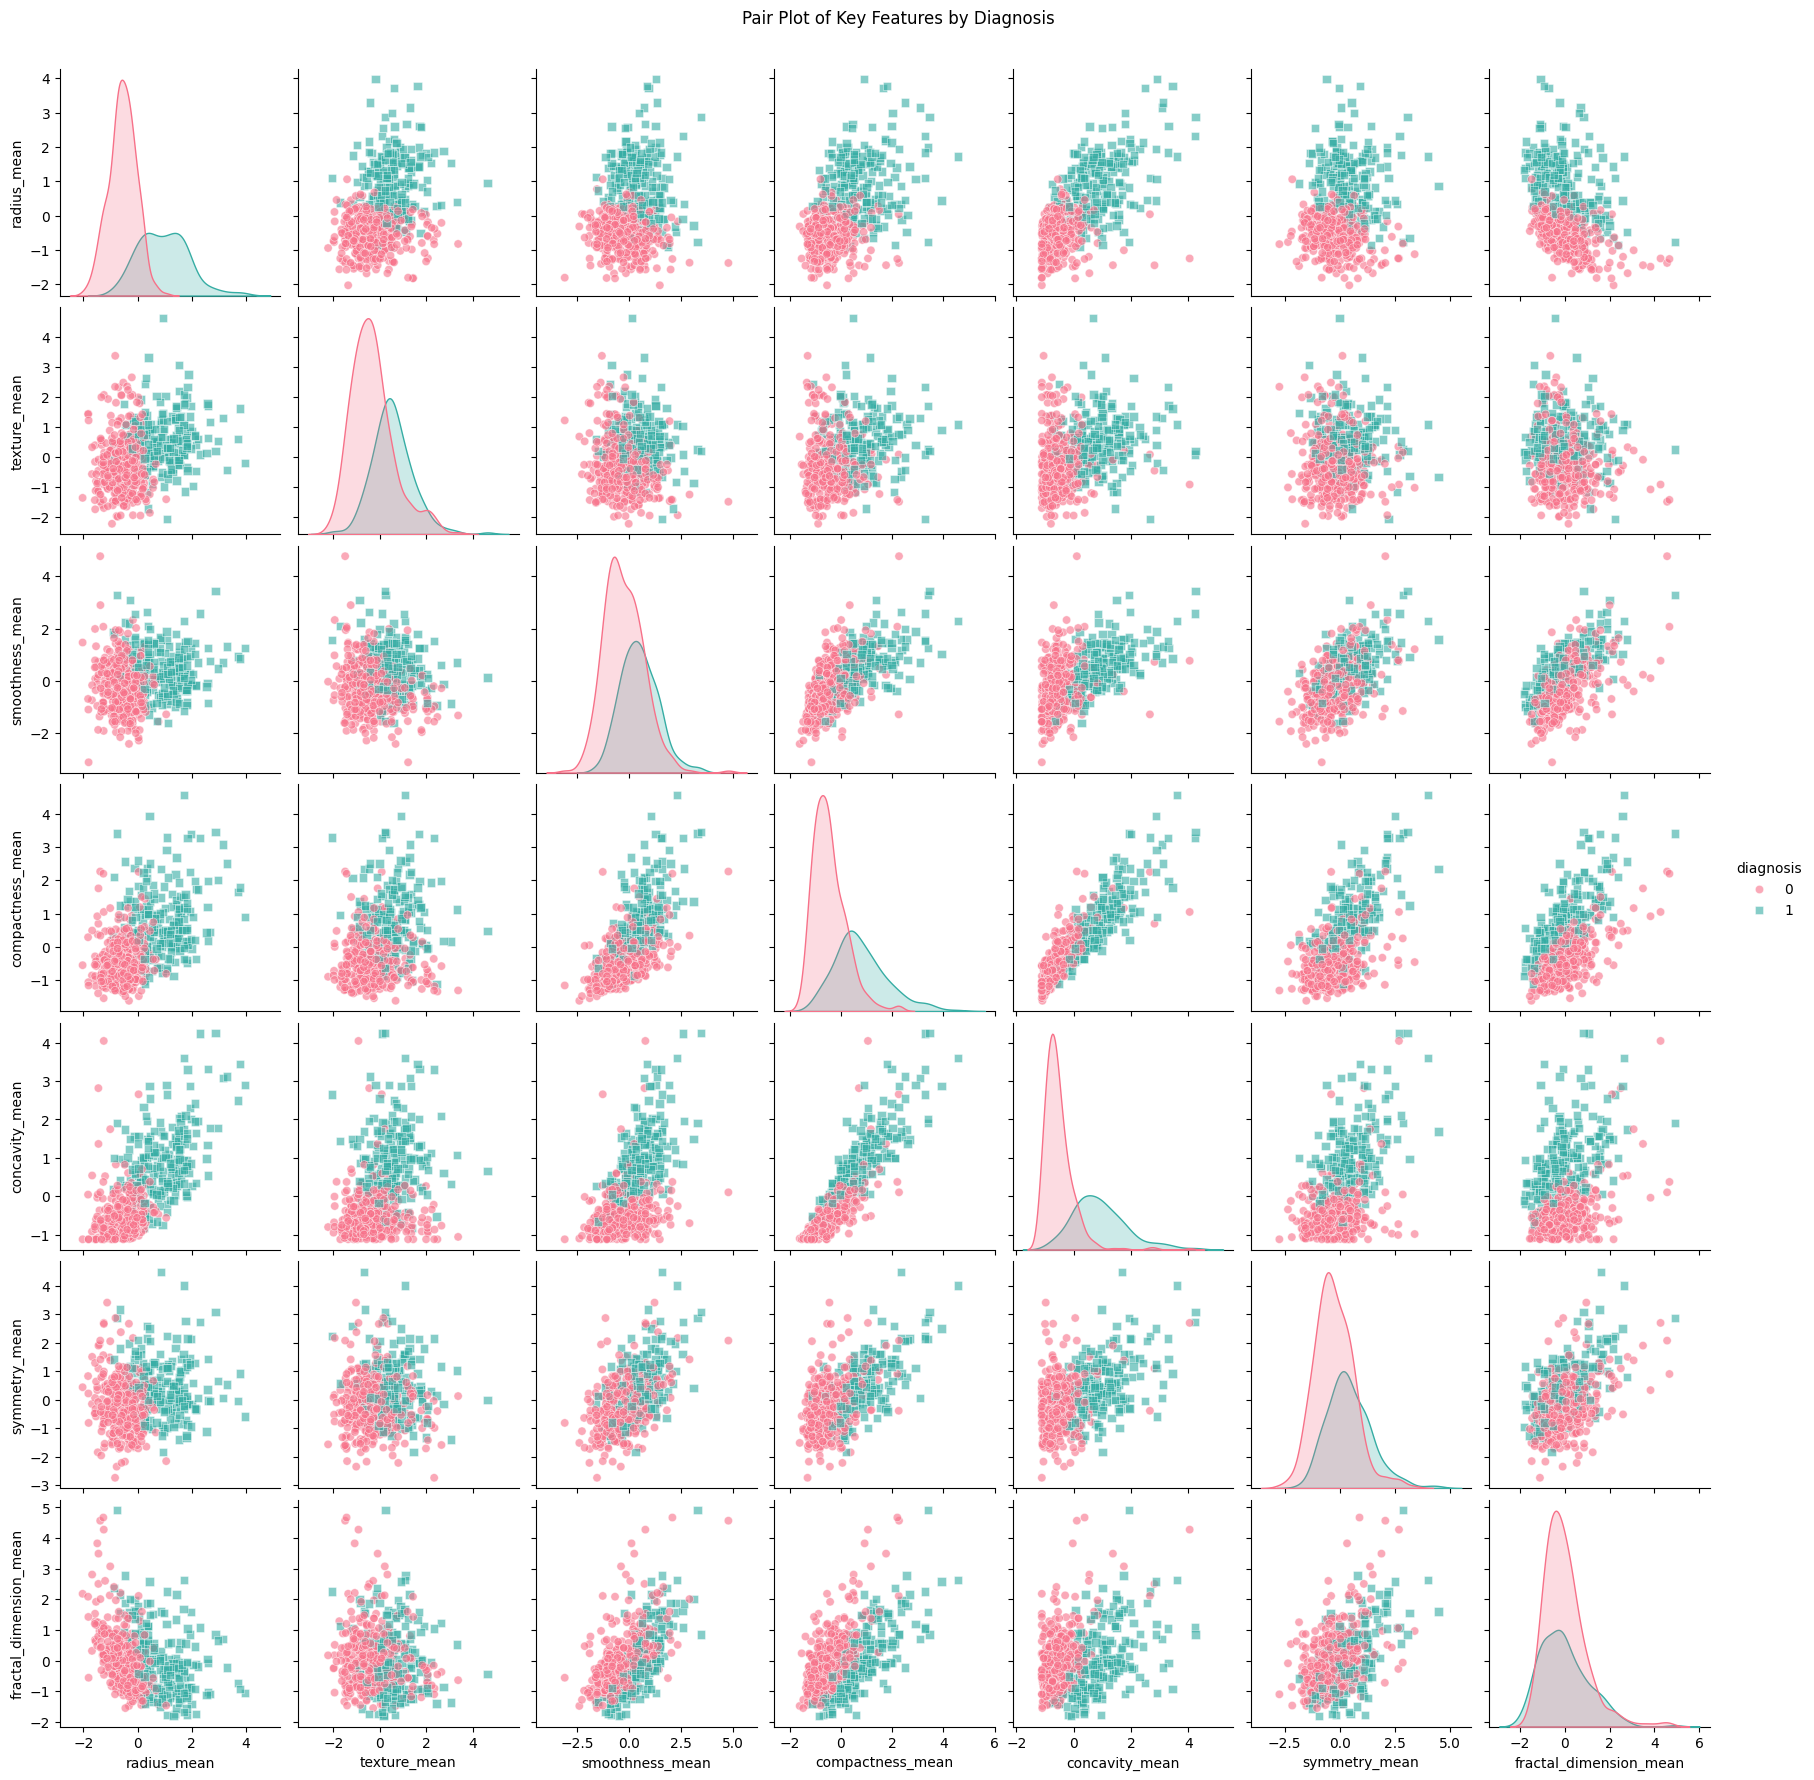

In [140]:
vis_df = X.copy()
vis_df['diagnosis'] = Y

plt.figure(figsize=(12, 10))
sns.pairplot(vis_df, 
             vars=vis_df.columns[:-1],
             hue='diagnosis', 
             palette='husl', 
             diag_kind='kde',
             markers=["o", "s"],
             plot_kws={'alpha': 0.6})

plt.suptitle('Pair Plot of Key Features by Diagnosis', y=1.02)
plt.show()

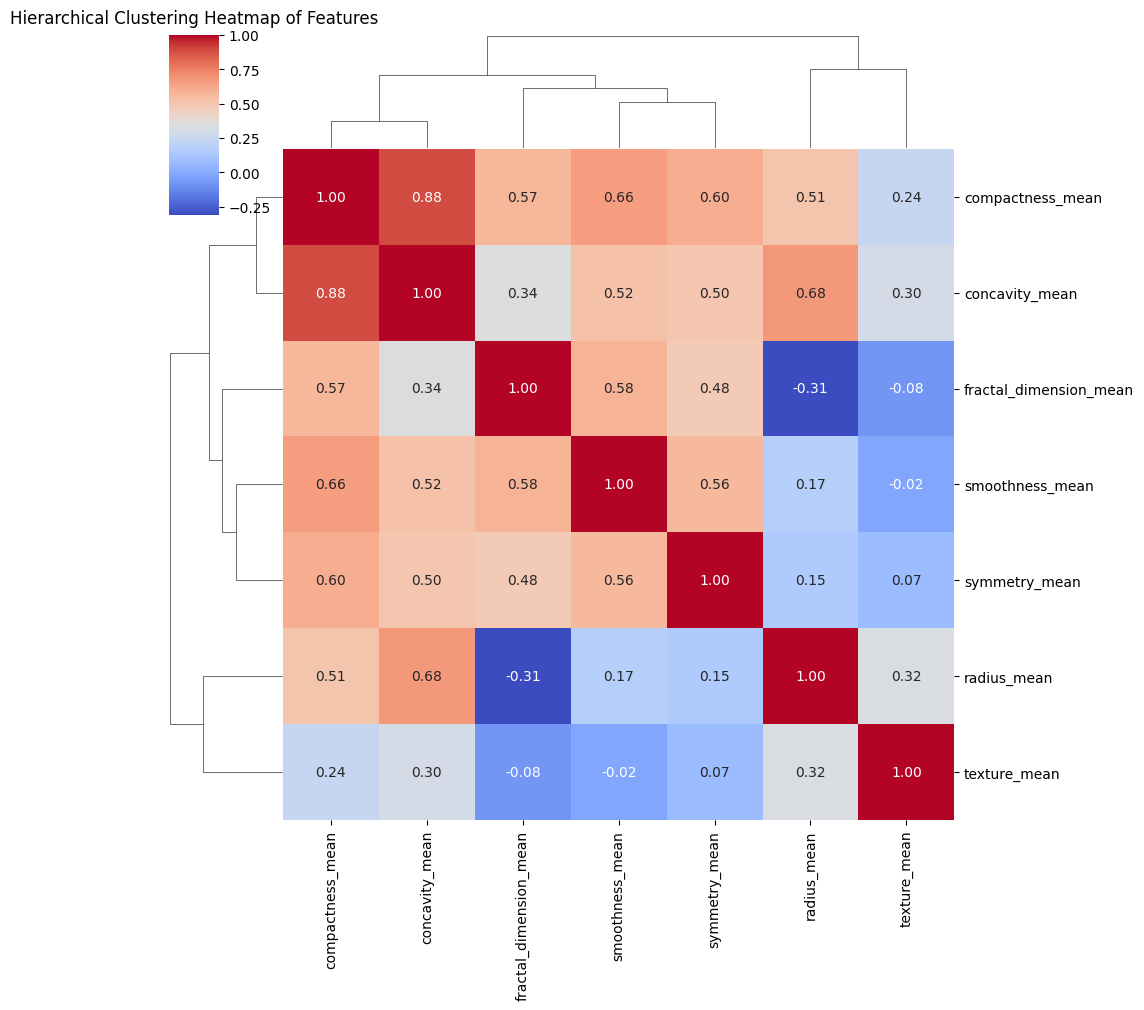

In [141]:
sns.clustermap(X.corr(), 
               annot=True, 
               fmt=".2f", 
               cmap='coolwarm', 
               figsize=(10, 10),
               dendrogram_ratio=0.15)

plt.title('Hierarchical Clustering Heatmap of Features', y=1.02)
plt.show()

## TASK 3